# Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Analysis

In [2]:
coursera = pd.read_csv("coursera_cleaned.csv")

In [3]:
duplicated = pd.read_csv("duplicated.csv")

In [4]:
# Por lo detectado en la limpieza, tenemos cursos en los que se utilizan dos skills.

In [5]:
coursera.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
coursera.head(3)

,course,rating,students,level,university,skills
0,Learn SQL Basics for Data Science,4.6,400.0,Beginner,"University of California, Davis",MySQL
1,Excel to MySQL: Analytic Techniques for Business,4.6,660.0,Beginner,Duke University,MySQL
2,Introduction to Structured Query Language (SQL),4.8,140.0,Intermediate,University of Michigan,MySQL


In [7]:
coursera.shape

(1720, 6)

In [8]:
coursera.skills.unique()

array(['MySQL', 'MongoDB', 'Tableau', 'Python', 'Machine Learning',
       'Java'], dtype=object)

### Statistical description  and correlation of rating and students columns. 

In [9]:
# To have an idea about mean, min and max values of "rating" and "number of students" values. 
# This is just as a reminder; students are placed in thousands.

In [10]:
coursera.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,1335.0,4.547416,0.300859,2.3,4.5,4.6,4.7,5.0
students,1132.0,113.570583,324.490738,1.5,6.2,22.5,84.0,4700.0


In [11]:
# Check correlation between rating and number of students

<AxesSubplot:>

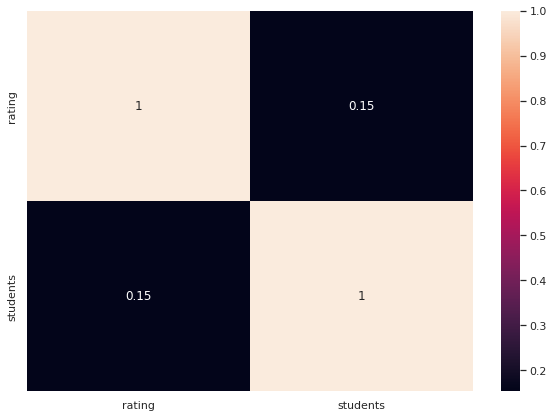

In [12]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (10.,7.)})
sns.set_style("whitegrid")
corrMatrix = coursera.corr()
sns.heatmap(corrMatrix, annot=True)

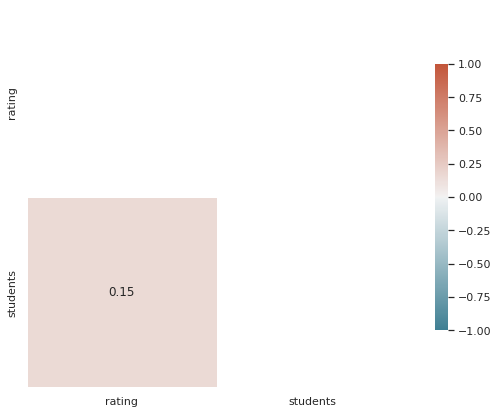

In [13]:
mascara = np.triu(np.ones_like(coursera.corr(), dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores
sns.heatmap(coursera.corr(),  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .7
                     },# barra lateral
            annot=True
);

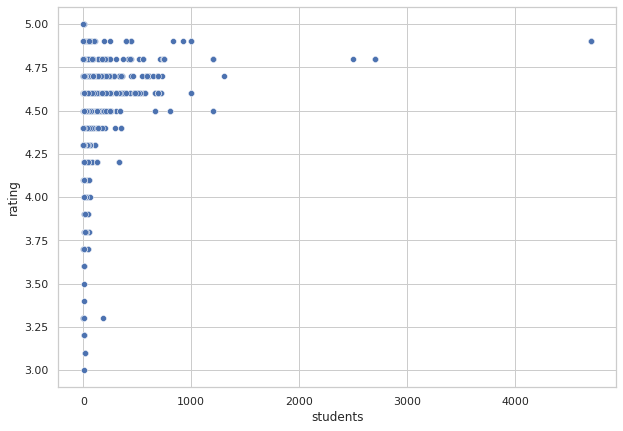

In [14]:
fig, axs = plt.subplots(figsize=(10,7))
sns.scatterplot(x="students", y="rating", data=coursera);

In [15]:
# Apparently there is a weak correlation between rating and number of students. However, from above graphic, we could 
# confirm that for great number of students, rating value is high.

### Level columns.

In [16]:
# Number of courses per level.

In [17]:
coursera.level.value_counts()

Intermediate    804
Beginner        673
Mixed           148
Advanced         76
Name: level, dtype: int64

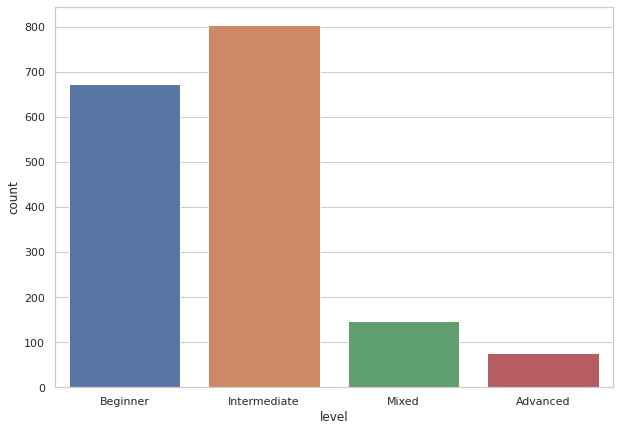

In [18]:
sns.countplot(x=coursera.level);

In [19]:
# Most popular courses are "Intermediate" and "Beginner" for this type of courses.

### University

In [20]:
# Universities and number of courses.

In [21]:
university = coursera.university.value_counts()

In [22]:
len(university)

134

In [23]:
# We have 134 universties/education centers for these courses.

In [24]:
university[0:10]

Coursera Project Network           516
IBM                                121
Google Cloud                       116
University of Michigan              89
DeepLearning.AI                     71
LearnQuest                          46
Johns Hopkins University            31
Duke University                     30
University of California, Davis     25
University of Colorado Boulder      23
Name: university, dtype: int64

In [25]:
# Top ten universities.

uni = university[0:10]

In [30]:
uni

Coursera Project Network           516
IBM                                121
Google Cloud                       116
University of Michigan              89
DeepLearning.AI                     71
LearnQuest                          46
Johns Hopkins University            31
Duke University                     30
University of California, Davis     25
University of Colorado Boulder      23
Name: university, dtype: int64

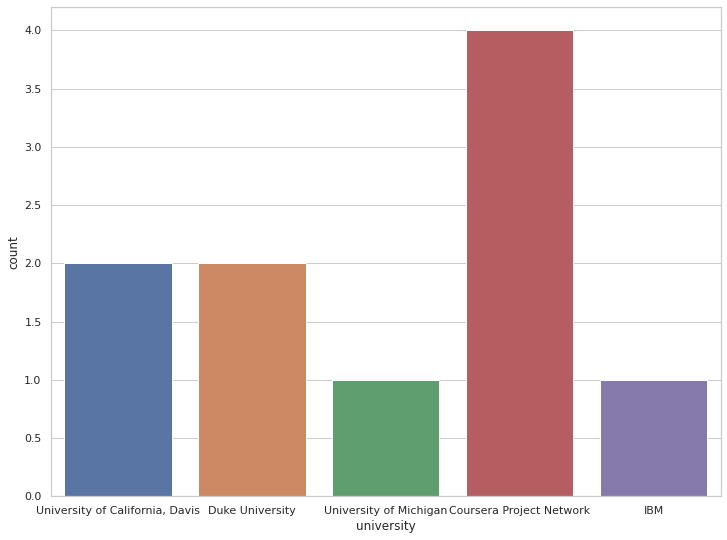

In [37]:
fig, axs = plt.subplots(figsize=(12,9))
sns.countplot(x=coursera.university[0:10]);

In [27]:
univ = pd.DataFrame(uni, columns=['university'])
univ = uni.reset_index()
univ.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)

In [28]:
univ

,university,num_skills
0,Coursera Project Network,516
1,IBM,121
2,Google Cloud,116
3,University of Michigan,89
4,DeepLearning.AI,71
5,LearnQuest,46
6,Johns Hopkins University,31
7,Duke University,30
8,"University of California, Davis",25
9,University of Colorado Boulder,23


In [38]:
uni.to_csv("visualization/uni.csv")

### Skills column

In [39]:
coursera.skills.value_counts()

Python              500
Machine Learning    500
Java                450
MongoDB             140
Tableau              70
MySQL                60
Name: skills, dtype: int64

In [40]:
# There is a huge amount of courses to improve skills in subjects related to Python, Java and Machine Learning.

### Skills & number of students

In [41]:
# Create dataframes per skills
Mysql = coursera[(coursera.skills=="MySQL")]
Mongo = coursera[(coursera.skills=='MongoDB')]
Tableau = coursera[(coursera.skills=='Tableau')]
Python = coursera[(coursera.skills=='Python')]
ML = coursera[(coursera.skills=='Machine Learning')]
java = coursera[(coursera.skills=='Java')]

In [42]:
# In cells below, I have summed the number of students.

MySQL

In [43]:
students_mysql = Mysql.students.sum()
students_mysql

2941.5

Mongo

In [44]:
students_mongo = Mongo.students.sum()
students_mongo

4729.7

Tableau

In [45]:
students_tableau = Tableau.students.sum()
students_tableau

3182.2

Python

In [46]:
students_python = Python.students.sum()
students_python

43802.1

Machine Learning

In [47]:
students_ml = round(ML.students.sum(), 1)
students_ml

45855.9

Java

In [48]:
students_java = round(java.students.sum(),1)
students_java

28050.5

In [49]:
# Create a dataframe for later visualization.

In [50]:
students_skills = pd.DataFrame()
students_skills["skills"]=["mysql", "mongo", "tableau", "python", 'machine_learning', "java"]
students_skills["students"]=[students_mysql, students_mongo, students_tableau, students_python, students_ml, students_java]
students_skills


,skills,students
0,mysql,2941.5
1,mongo,4729.7
2,tableau,3182.2
3,python,43802.1
4,machine_learning,45855.9
5,java,28050.5


In [51]:
students_skills.to_csv("visualization/students_skills.csv")

### Skills & University

In [52]:
# Create a dataframe of universities per skils to be visuaized.

MySQL

In [53]:
university_mysql = Mysql.university.value_counts()
uni_mysql = pd.DataFrame(university_mysql, columns=['university'])
uni_mysql = uni_mysql.reset_index()
uni_mysql.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_mysql.head()

,university,num_skills
0,Coursera Project Network,36
1,Duke University,4
2,Google Cloud,4
3,University of Michigan,3
4,University of Colorado System,3


In [54]:
uni_mysql.to_csv("visualization/uni_mysql.csv")

Mongo

In [55]:
university_mongo = Mongo.university.value_counts()
uni_mongo = pd.DataFrame(university_mongo, columns=['university'])
uni_mongo = uni_mongo.reset_index()
uni_mongo.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_mongo.head()

,university,num_skills
0,Coursera Project Network,20
1,University of Michigan,10
2,Johns Hopkins University,7
3,University of Washington,6
4,University of Colorado Boulder,6


In [56]:
uni_mongo.to_csv("visualization/uni_mongo.csv")

Tableau

In [57]:
university_tableau = Tableau.university.value_counts()
uni_tableau = pd.DataFrame(university_tableau, columns=['university'])
uni_tableau = uni_tableau.reset_index()
uni_tableau.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_tableau.head()

,university,num_skills
0,Coursera Project Network,25
1,"University of California, Davis",6
2,Google,6
3,E-Learning Development Fund,5
4,Moscow Institute of Physics and Technology,4


In [58]:
uni_tableau.to_csv("visualization/uni_tableau.csv")

Python

In [59]:
university_python = Python.university.value_counts()
uni_python = pd.DataFrame(university_python, columns=['university'])
uni_python = uni_python.reset_index()
uni_python.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_python.head()

,university,num_skills
0,Coursera Project Network,181
1,IBM,62
2,University of Michigan,45
3,DeepLearning.AI,25
4,Codio,13


In [60]:
uni_python.to_csv("visualization/uni_python.csv")

Machine Learning

In [61]:
university_ml = ML.university.value_counts()
uni_ml = pd.DataFrame(university_ml, columns=['university'])
uni_ml = uni_ml.reset_index()
uni_ml.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_ml.head()

,university,num_skills
0,Google Cloud,78
1,Coursera Project Network,65
2,IBM,45
3,DeepLearning.AI,42
4,Microsoft,13


In [62]:
uni_ml.to_csv("visualization/uni_ml.csv")

Java

In [63]:
university_java = java.university.value_counts()
uni_java = pd.DataFrame(university_java, columns=['university'])
uni_java = uni_java.reset_index()
uni_java.rename(columns={'index':'university',
                                   'university':'num_skills'}, inplace=True)
uni_java.head()

,university,num_skills
0,Coursera Project Network,189
1,LearnQuest,27
2,Google Cloud,19
3,University of Michigan,18
4,Duke University,11


In [64]:
uni_java.to_csv("visualization/uni_java.csv")

### Skills & Level

In [65]:
# Create a dataframe of levels per skils to be visuaized.

MySQL

In [66]:
level_mysql = Mysql.level.value_counts()
lev_mysql = pd.DataFrame(level_mysql, columns=['level'])
lev_mysql = level_mysql.reset_index()
lev_mysql.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_mysql.head()

,level,num_skills
0,Intermediate,29
1,Beginner,26
2,Mixed,4
3,Advanced,1


In [67]:
lev_mysql.to_csv("visualization/lev_mysql.csv")

Mongo

In [68]:
level_mongo = Mongo.level.value_counts()
lev_mongo = pd.DataFrame(level_mongo, columns=['level'])
lev_mongo = level_mongo.reset_index()
lev_mongo.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_mongo.head()

,level,num_skills
0,Beginner,59
1,Intermediate,48
2,Mixed,31
3,Advanced,1


In [69]:
lev_mongo.to_csv("visualization/lev_mongo.csv")

Tableau

In [70]:
level_tableau = Tableau.level.value_counts()
lev_tableau = pd.DataFrame(level_tableau, columns=['level'])
lev_tableau = level_tableau.reset_index()
lev_tableau.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_tableau.head()

,level,num_skills
0,Beginner,38
1,Intermediate,24
2,Mixed,6
3,Advanced,2


In [71]:
lev_tableau.to_csv("visualization/lev_tableau.csv")

Python

In [72]:
level_python = Python.level.value_counts()
lev_python = pd.DataFrame(level_python, columns=['level'])
lev_python = level_python.reset_index()
lev_python.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_python.head()

,level,num_skills
0,Intermediate,229
1,Beginner,200
2,Mixed,42
3,Advanced,23


In [73]:
lev_python.to_csv("visualization/lev_python.csv")

Machine Learning

In [74]:
level_ml = ML.level.value_counts()
lev_ml = pd.DataFrame(level_ml, columns=['level'])
lev_ml = level_ml.reset_index()
lev_ml.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_ml.head()

,level,num_skills
0,Intermediate,238
1,Beginner,185
2,Advanced,38
3,Mixed,32


In [75]:
lev_ml.to_csv("visualization/lev_ml.csv")

Java

In [76]:
level_java = java.level.value_counts()
lev_java = pd.DataFrame(level_java, columns=['level'])
lev_java = level_java.reset_index()
lev_java.rename(columns={'index':'level',
                                   'level':'num_skills'}, inplace=True)
lev_java.head()

,level,num_skills
0,Intermediate,236
1,Beginner,165
2,Mixed,33
3,Advanced,11


In [77]:
lev_java.to_csv("visualization/lev_java.csv")

### Level & number of students

In [78]:
# Number of students per level.

In [79]:
Beginner = coursera[(coursera.level=="Beginner")]
Intermediate = coursera[(coursera.level=="Intermediate")]
Mixed = coursera[(coursera.level=="Mixed")]
Advanced = coursera[(coursera.level=="Advanced")]

Beginner

In [80]:
students_beginner = round(Beginner.students.sum(), 1)
students_beginner

59396.1

Intermediate

In [81]:
students_intermediate = round(Intermediate.students.sum(), 1)
students_intermediate

39065.1

Mixed

In [82]:
students_mixed = round(Mixed.students.sum(), 1)
students_mixed

27462.2

Advanced

In [83]:
students_advanced = round(Advanced.students.sum(), 1)
students_advanced

2638.5

In [84]:
# Create dataframe with levels and number of students to be visualized.

In [85]:
students_level = pd.DataFrame()
students_level["level"]=["Beginner", "Intermediate", "Mixed", "Advanced"]
students_level["students"]=[students_beginner, students_intermediate, students_mixed, students_advanced]
students_level

,level,students
0,Beginner,59396.1
1,Intermediate,39065.1
2,Mixed,27462.2
3,Advanced,2638.5


In [86]:
students_level.to_csv("visualization/students_level.csv")